In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
#drop day, month, year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [12]:
## Encoding
df['Classes'] = np.where(df['Classes'].astype(str).str.contains('not fire'), 0, 1)

In [13]:
df['Classes'].value_counts()

Classes
1    243
Name: count, dtype: int64

In [14]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [15]:
##Independent and dependent features
X=df.drop('FWI', axis=1)
y=df['FWI']

In [11]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [25]:
#Train test Split 
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [26]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [27]:
##Feature selection based on Corr
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,NaN,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,NaN,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,NaN,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,NaN,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,NaN,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,NaN,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,NaN,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,NaN,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,NaN,0.114897
Classes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\TEI-1085\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

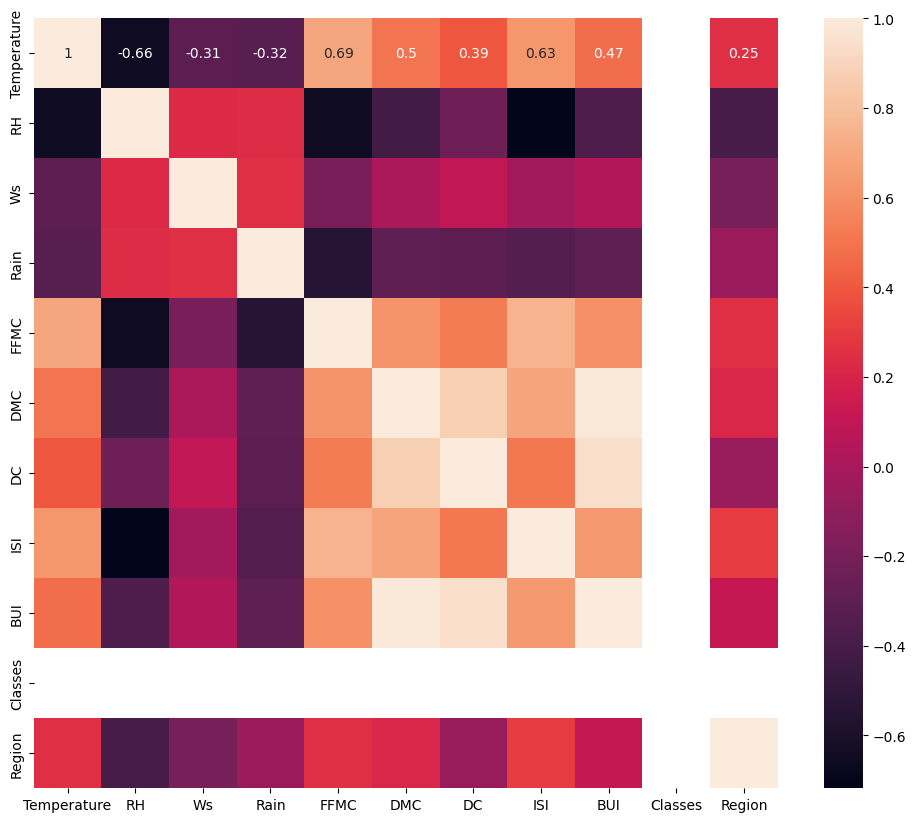

In [28]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr= X_train.corr()
sns.heatmap(corr,annot=True)

In [29]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [30]:
correlation(X_train , 0.85)

{'BUI', 'DC'}

In [38]:
## drop features when correlation is more than 0.85
#X_train.drop(corr_features, axis=1, inplace=True)
X_train.drop(['DC', 'BUI'], axis=1, inplace=True)
#X_test.drop(['DC', 'BUI'], axis=1, inplace=True)
#X_train.shape, X_test.shape
X_test.shape


KeyError: "['DC', 'BUI'] not found in axis"

In [39]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,1,0
141,31,72,14,0.2,60.2,3.8,0.8,1,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,1,0
119,32,47,14,0.7,77.5,7.1,1.8,1,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,1,0
14,28,80,17,3.1,49.4,3.0,0.4,1,0
92,25,76,17,7.2,46.0,1.3,0.2,1,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


## Feature Scalling 

In [40]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)


In [41]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         0.        , -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         0.        ,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.        ,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         0.        , -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.        ,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         0.        , -0.98907071]])

## Box Plots to understand effects of Standard Scaler

Text(0.5, 1.0, 'X Train after')

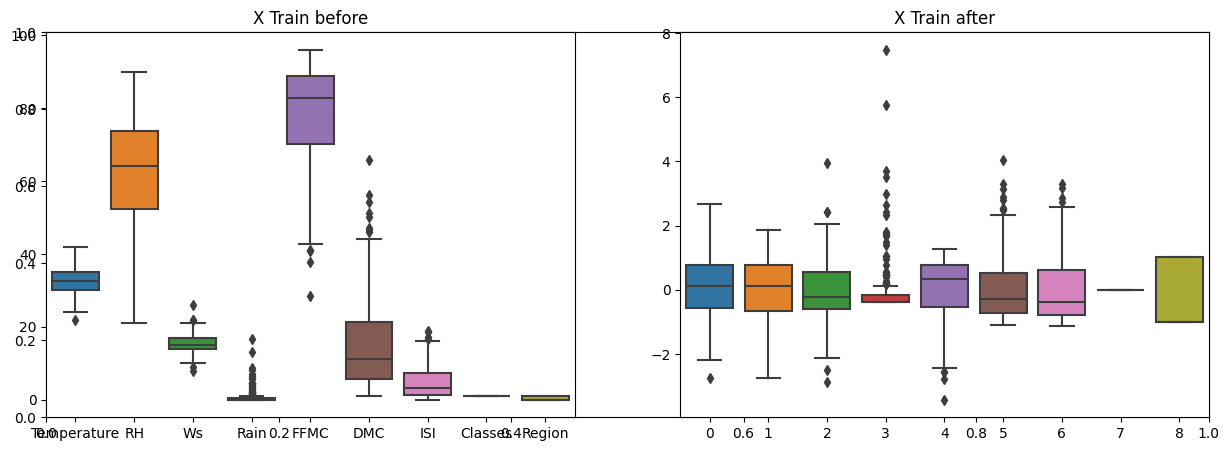

In [42]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X Train before")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X Train after")

### Linear Regression Model

mean absolute error 0.5806361642310043
R2 Score 0.9830321384727897


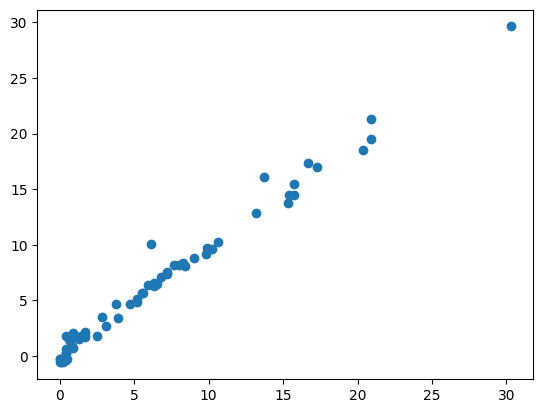

In [43]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg= LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test, y_pred)
print("mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

## Lasso Regression


mean absolute error 1.1331759949144085
R2 Score 0.9492020263112388


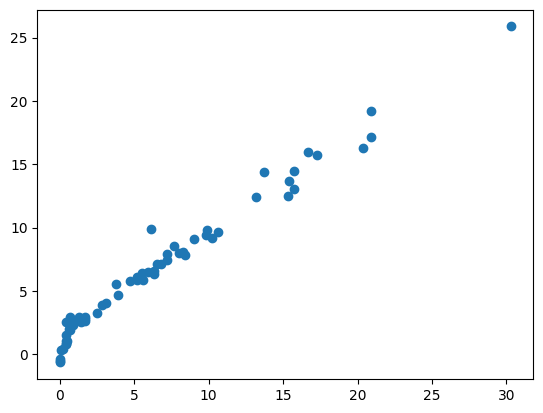

In [44]:
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Lasso= Lasso()
Lasso.fit(X_train_scaled, y_train)
y_pred = Lasso.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test, y_pred)
print("mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

mean absolute error 0.6297839301098623
R2 Score 0.981393944688068


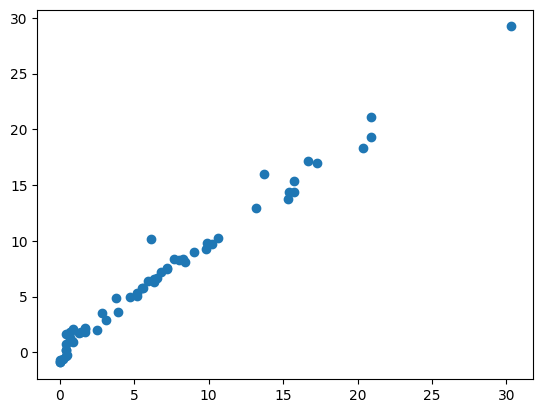

In [45]:
##Cross Validation of Lasso
from sklearn.linear_model import LassoCV
lassoCV = LassoCV()
lassoCV.fit(X_train_scaled, y_train)
y_pred = lassoCV.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test, y_pred)
print("mean absolute error", mae)
print("R2 Score", score)

## Ridge regression model

mean absolute error 0.5969613029130082
R2 Score 0.9824907652592585


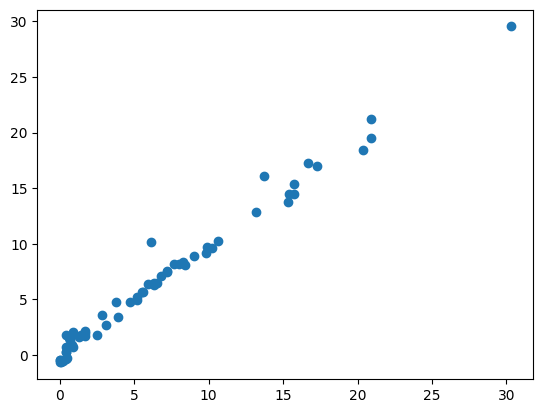

In [46]:
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Ridge= Ridge()
Ridge.fit(X_train_scaled, y_train)
y_pred = Ridge.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test, y_pred)
print("mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

mean absolute error 0.5969613029130082
R2 Score 0.9824907652592585


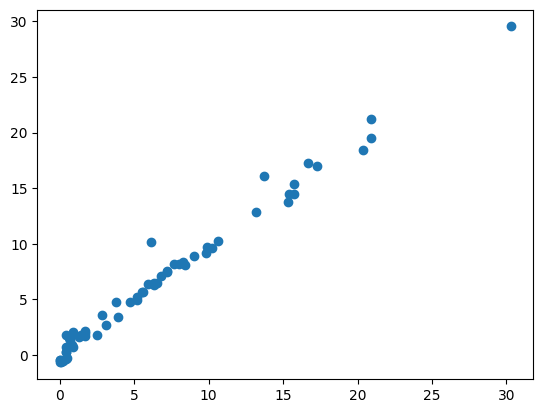

In [111]:
##Cross Validation of Ridge
from sklearn.linear_model import RidgeCV
RidgeCV = RidgeCV(cv=5)
RidgeCV.fit(X_train_scaled, y_train)
y_pred = RidgeCV.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test, y_pred)
print("mean absolute error", mae)
print("R2 Score", score)

### Elasticnet Regression

mean absolute error 1.9284414511796732
R2 Score 0.868664603256521


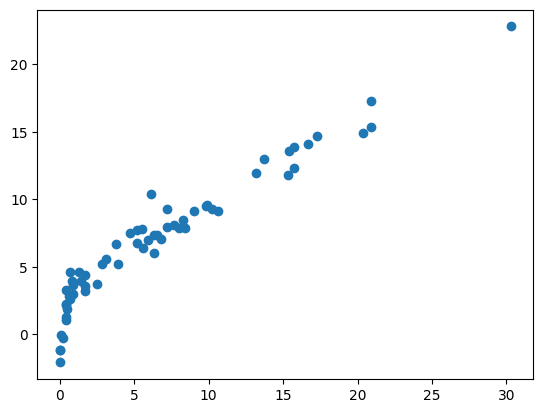

In [47]:
from sklearn.linear_model import ElasticNet 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ElasticNet= ElasticNet()
ElasticNet.fit(X_train_scaled, y_train)
y_pred = ElasticNet.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test, y_pred)
print("mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_pred)

mean absolute error 0.6716732201553721
R2 Score 0.9796396289421408


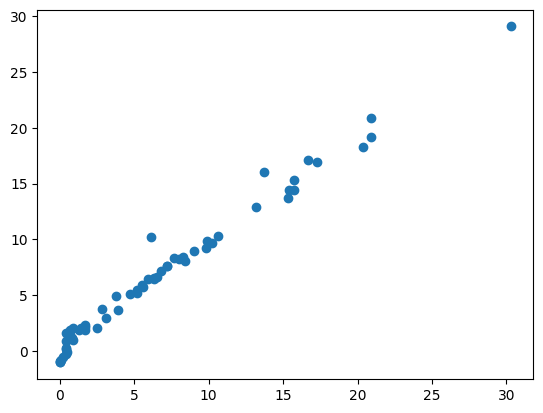

In [112]:
##Cross Validation of Elasticnet
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv=5)
ElasticNetCV.fit(X_train_scaled, y_train)
y_pred = ElasticNetCV.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae= mean_absolute_error(y_test,y_pred)
score= r2_score(y_test, y_pred)
print("mean absolute error", mae)
print("R2 Score", score)

## Pickle the machine leanring model , preprocessing model standdars scler

In [48]:
scaler

StandardScaler()

In [50]:
Ridge

Ridge()

In [53]:
Import pickle
pickle.dump(scaler , open("scaler.pkl", 'wb'))
pickle.dump(Ridge , open("ridge.pkl", 'rb'))

SyntaxError: invalid syntax (2685071237.py, line 1)